<a href="https://colab.research.google.com/github/rashmeetkaurbagal/SE.Lab.Experiments/blob/main/SE_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Hard coding stage***

Enter temperature T(6) in Celsius: 20
Enter temperature T(12) in Celsius: 32
Enter temperature T(18) in Celsius: 22
Quadratic: T(t) = -0.306t² + 7.500t + -14.000


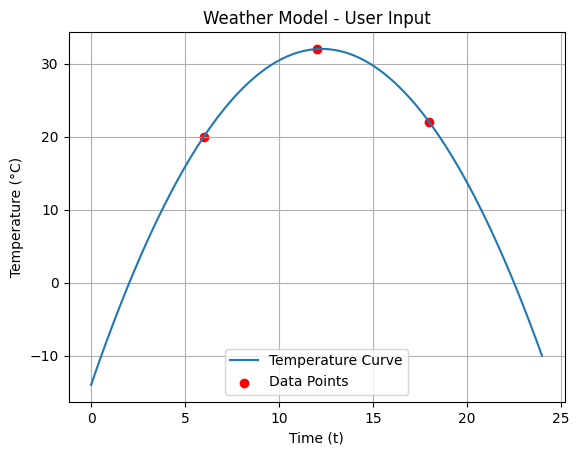

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ask user for temperature inputs at fixed times
t = np.array([6, 12, 18])
T = []
for hour in t:
    temp = float(input(f"Enter temperature T({hour}) in Celsius: "))
    T.append(temp)
T = np.array(T)

# Build matrix A and vector B
A = np.array([[t[0]**2, t[0], 1],
              [t[1]**2, t[1], 1],
              [t[2]**2, t[2], 1]])
B = np.array(T)

# Solve for a, b, c
a, b, c = np.linalg.solve(A, B)
print(f"Quadratic: T(t) = {a:.3f}t² + {b:.3f}t + {c:.3f}")

# Plot
x_vals = np.linspace(0, 24, 100)
y_vals = a * x_vals**2 + b * x_vals + c

plt.plot(x_vals, y_vals, label='Temperature Curve')
plt.scatter(t, T, color='red', label='Data Points')
plt.xlabel('Time (t)')
plt.ylabel('Temperature (°C)')
plt.title('Weather Model - User Input')
plt.legend()
plt.grid(True)
plt.show()


# ***Keyboard inputs***


Enter 3 time-temp pairs (format: time temperature):
Pair 1: 6 20
Pair 2: 12 32
Pair 3: 18 22
Quadratic: T(t) = -0.306t² + 7.500t + -14.000


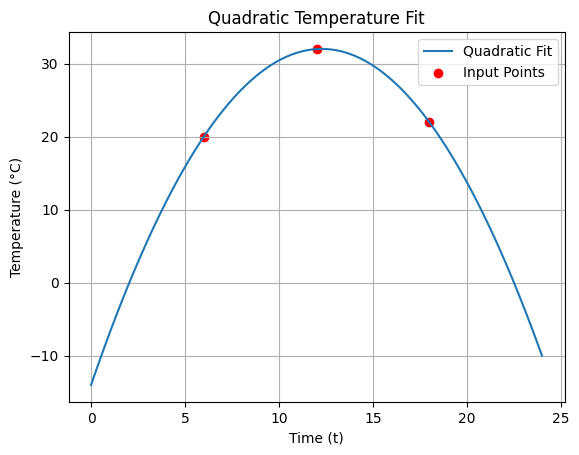

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = []
T = []

print("Enter 3 time-temp pairs (format: time temperature):")
for i in range(3):
    ti, Ti = map(float, input(f"Pair {i+1}: ").split())
    t.append(ti)
    T.append(Ti)

A = np.array([[t[0]**2, t[0], 1],
              [t[1]**2, t[1], 1],
              [t[2]**2, t[2], 1]])
B = np.array(T)

a, b, c = np.linalg.solve(A, B)
print(f"Quadratic: T(t) = {a:.3f}t² + {b:.3f}t + {c:.3f}")

# Plot the graph
x_vals = np.linspace(0, 24, 100)
y_vals = a * x_vals**2 + b * x_vals + c

plt.plot(x_vals, y_vals, label='Quadratic Fit')
plt.scatter(t, T, color='red', label='Input Points')
plt.xlabel('Time (t)')
plt.ylabel('Temperature (°C)')
plt.title('Quadratic Temperature Fit')
plt.legend()
plt.grid(True)
plt.show()


# ***Read from file (single input set):***

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving weather_data.txt.txt to weather_data.txt (1).txt
Saving weather_sets.txt.txt to weather_sets.txt.txt


Quadratic: T(t) = -0.306t² + 7.500t + -14.000


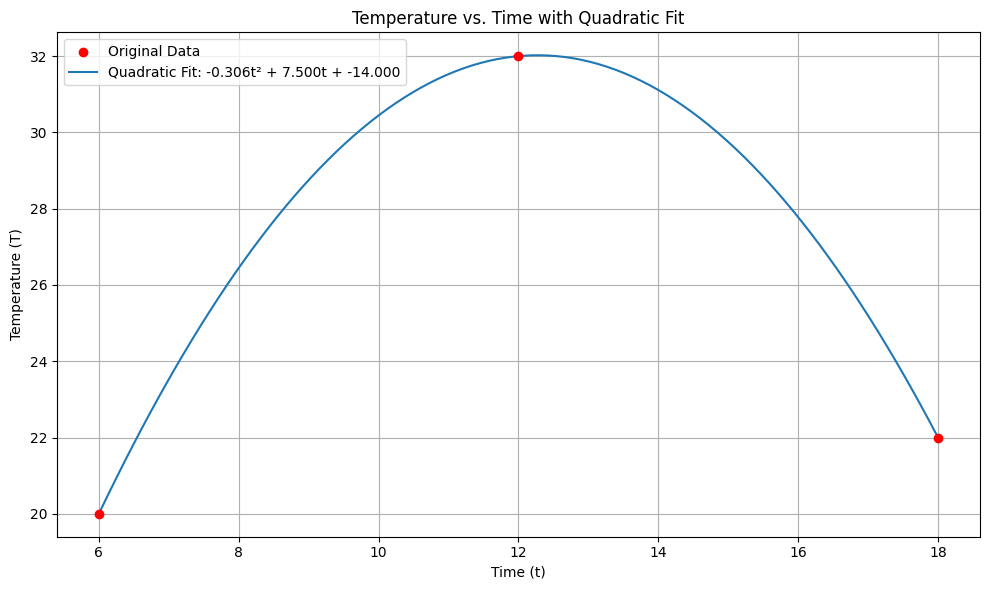

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
with open("weather_data.txt") as f:
    lines = f.readlines()

t, T = [], []
for line in lines:
    ti, Ti = map(float, line.strip().split())
    t.append(ti)
    T.append(Ti)

# Solve for quadratic coefficients
A = np.array([[t[0]**2, t[0], 1],
              [t[1]**2, t[1], 1],
              [t[2]**2, t[2], 1]])
B = np.array(T[:3])  # Ensure we only use first 3 points for the quadratic fit

a, b, c = np.linalg.solve(A, B)
print(f"Quadratic: T(t) = {a:.3f}t² + {b:.3f}t + {c:.3f}")

# Create plot
plt.figure(figsize=(10, 6))

# Plot original data points
plt.scatter(t, T, color='red', label='Original Data', zorder=5)

# Plot quadratic fit
t_fit = np.linspace(min(t), max(t), 100)
T_fit = a * t_fit**2 + b * t_fit + c
plt.plot(t_fit, T_fit, label=f'Quadratic Fit: {a:.3f}t² + {b:.3f}t + {c:.3f}')

# Add labels and title
plt.xlabel('Time (t)')
plt.ylabel('Temperature (T)')
plt.title('Temperature vs. Time with Quadratic Fit')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# For Stage 3
with open("weather_data.txt", "w") as f:
    f.write("6 20\n12 32\n18 22\n")

# For Stage 4
with open("weather_sets.txt", "w") as f:
    f.write("6 20\n12 32\n18 22\n")
    f.write("5 18\n10 27\n15 23\n")


# ***Multiple input sets from file***

Model 1: T(t) = -0.306t² + 7.500t + -14.000


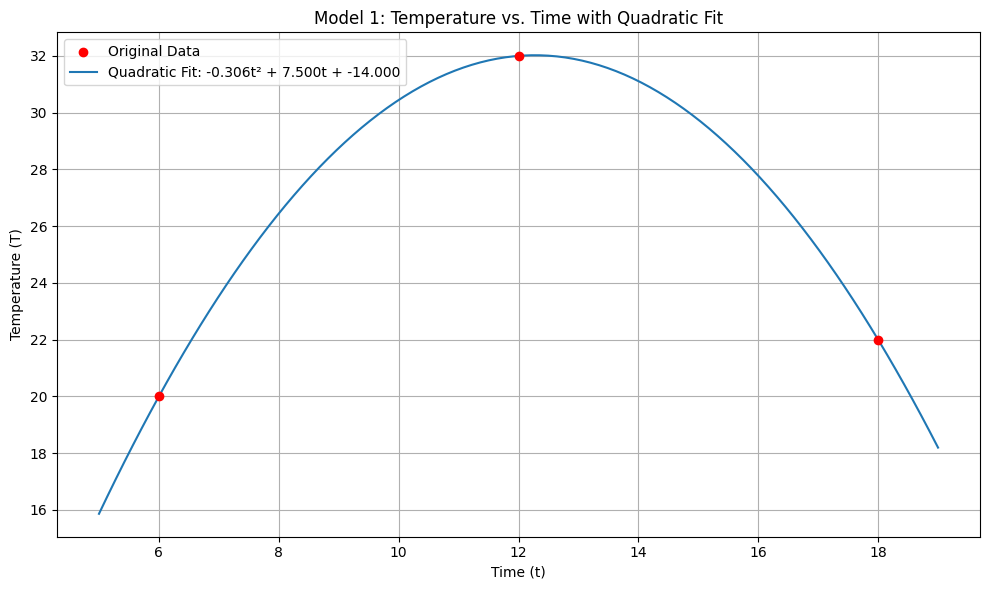

Model 2: T(t) = -0.260t² + 5.700t + -4.000


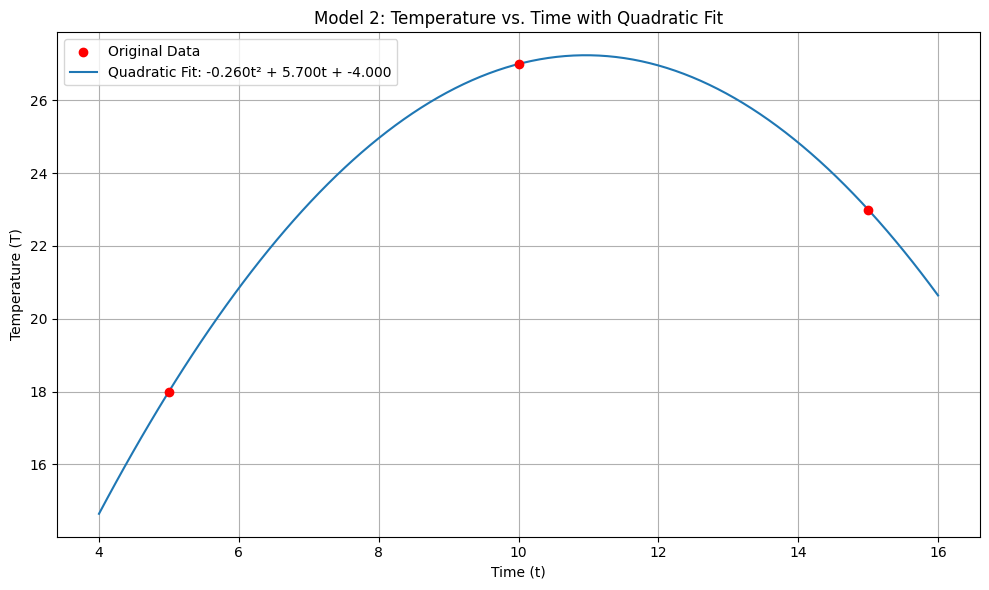

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_and_plot(t, T, index):
    # Solve for quadratic coefficients
    A = np.array([[t[0]**2, t[0], 1],
                  [t[1]**2, t[1], 1],
                  [t[2]**2, t[2], 1]])
    B = np.array(T)
    a, b, c = np.linalg.solve(A, B)

    print(f"Model {index+1}: T(t) = {a:.3f}t² + {b:.3f}t + {c:.3f}")

    # Create plot
    plt.figure(figsize=(10, 6))

    # Plot original data points
    plt.scatter(t, T, color='red', label='Original Data', zorder=5)

    # Plot quadratic fit
    t_fit = np.linspace(min(t)-1, max(t)+1, 100)  # Slightly extend range for better visualization
    T_fit = a * t_fit**2 + b * t_fit + c
    plt.plot(t_fit, T_fit, label=f'Quadratic Fit: {a:.3f}t² + {b:.3f}t + {c:.3f}')

    # Add labels and title
    plt.xlabel('Time (t)')
    plt.ylabel('Temperature (T)')
    plt.title(f'Model {index+1}: Temperature vs. Time with Quadratic Fit')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

# Read and process data
with open("weather_sets.txt") as f:
    lines = [line.strip() for line in f if line.strip()]

for i in range(0, len(lines), 3):
    chunk = lines[i:i+3]
    t, T = [], []
    for line in chunk:
        ti, Ti = map(float, line.split())
        t.append(ti)
        T.append(Ti)
    solve_and_plot(t, T, i // 3)